# Part I - Ford GoBike System Data Exploration
## by Ashwell Dickson

## Introduction
> This document explores a dataset containing data on bike trips made in a bike sharing system.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Overview of data table
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Overview of data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# Check for duplicated records
sum(df.duplicated())

0

In [6]:
# Show Nan values for member_birth_year
df[df['member_birth_year'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
147,372,2019-02-28 22:46:19.1140,2019-02-28 22:52:31.4770,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
176,730,2019-02-28 22:28:50.5140,2019-02-28 22:41:00.8970,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,NaN,NaN,No
220,1425,2019-02-28 22:05:25.5530,2019-02-28 22:29:11.1180,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,NaN,NaN,No
266,1302,2019-02-28 21:53:13.2740,2019-02-28 22:14:56.1730,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,NaN,NaN,No
292,1468,2019-02-28 21:43:04.3630,2019-02-28 22:07:32.6640,321.0,5th St at Folsom,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,NaN,NaN,No


> It seems that when the member_birth_year column is Nan the member_gender column is Nan as well.

In [7]:
# Show Nan values for start_station_id
df[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


> It seem that when the start_station_id is Nan, the end_station_id is Nan as well.

In [8]:
# Drop records with Nan values
df = df.dropna()
df.reset_index(drop = True, inplace = True)

In [9]:
# Changing the data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
# Changing the data type of start_station_id, end_station_id and member_birth_year to int64
df.start_station_id = df.start_station_id.astype('int64')
df.end_station_id = df.end_station_id.astype('int64')
df.member_birth_year = df.member_birth_year.astype('int64')

In [10]:
# Create a column showing the user's age using the member_birth_year column, subtracting it from 2019, the year the dataset was pulled.
df['member_age'] = 2019 - df['member_birth_year']

In [11]:
df['member_age'].value_counts().sort_index(ascending=True)

18        34
19      1675
20      2504
21      3208
22      3476
23      4637
24      7420
25      7654
26      9323
27      8245
28      8484
29      8640
30      8967
31     10214
32      8010
33      7953
34      7023
35      6557
36      5953
37      4987
38      4344
39      5011
40      3756
41      2830
42      2706
43      2435
44      2503
45      2633
46      2080
47      1909
       ...  
63       392
64       134
65       301
66       158
67       189
68       180
69       178
70        99
71        51
72       135
73        19
74       105
75         2
76        30
77        21
78         9
80        11
81         3
85         2
86        20
88        89
89         1
91         1
92         1
99         3
109        1
117       11
118        6
119       53
141        1
Name: member_age, Length: 75, dtype: int64

In [12]:
# Overview of data information after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null int64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null int64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
member_age                 174952 non-null int64
dtypes: datetime64[ns](2)

In [13]:
# Show descriptive statistics for the numerical variable.
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000


### What is the structure of your dataset?

> There are initially 183,411 individual trips in the dataset with 16 attributes. 3 of the attributes give details on the trips'time and duration. 8 of the attributes give details on where the trip took place. The last 5 attributes give details on the user.

> After dropping record with Nan values the dataset is left with 174,951 records/trips

### What is/are the main feature(s) of interest in your dataset?

> The main interest of the exploration in to this dataset is the trip duration and how it is related to the other attributes in the dataset.

> Since these variable will form part of the main exploration I have dropped the Nan values in these records

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that the member birth year (age), and the member gender will have significant relations to the trip duration. Other attributes i believe will also show a degree of relatedness is the data on the stations.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration_sec.

In [14]:
# Setting up a function to call standard scaled histograms
def stdhist(df, x_var, interval, figsize = [14,6], chart_title = ''):
    # Setting bin intervals
    bins = np.arange(df[x_var].min(), df[x_var].max() + interval, interval)
    # Setting plot arguments
    df[x_var].hist(bins = bins, figsize = figsize, grid = False)
    # Replacing the underscore in the x axis variable with a space
    x_var = x_var.replace('_',' ')
    # Chart title label
    plt.title(f'Distribution of {x_var}{chart_title}'.title(), weight = 'bold')
    # X Axis label
    plt.xlabel(x_var.title())

[0, 5000, 0, 60000]

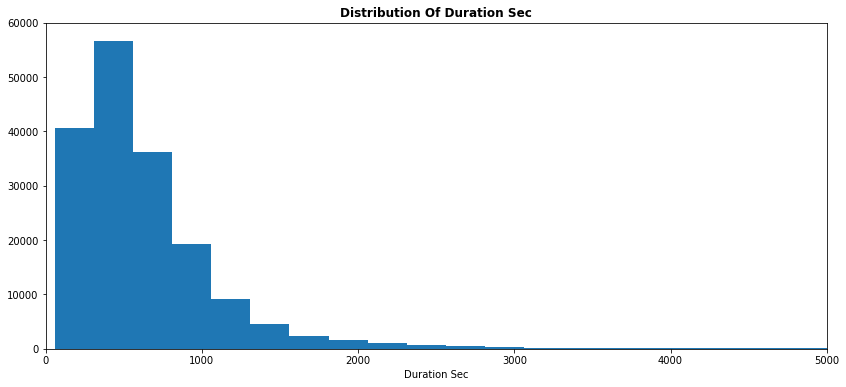

In [15]:
# Standard scaled histogram for duration_sec
stdhist(df, 'duration_sec', 250)
plt.axis([0, 5000, 0, 60000])

> There is a long tail in the distribution so lets put it on log scale

In [16]:
# Setting up a function to call logarithmic scaled histograms
def loghist(df, x_var, log_binsize, bin_min, figsize = [14,6], chart_title = ''):
    # Setting bin intervals
    bins = 10 ** np.arange(bin_min, np.log10(df[x_var].max()) + log_binsize, log_binsize)
    # Setting plot arguments
    df[x_var].hist(bins = bins, figsize = figsize, grid = False)
    plt.xscale('log')
    # Replacing the underscore in the x axis variable with a space
    x_var = x_var.replace('_',' ')
    # Chart title label
    plt.title(f'Distribution of {x_var}{chart_title}'.title(), weight = 'bold')
    # X Axis label
    plt.xlabel(x_var.title())

[200, 10000, 0, 14000]

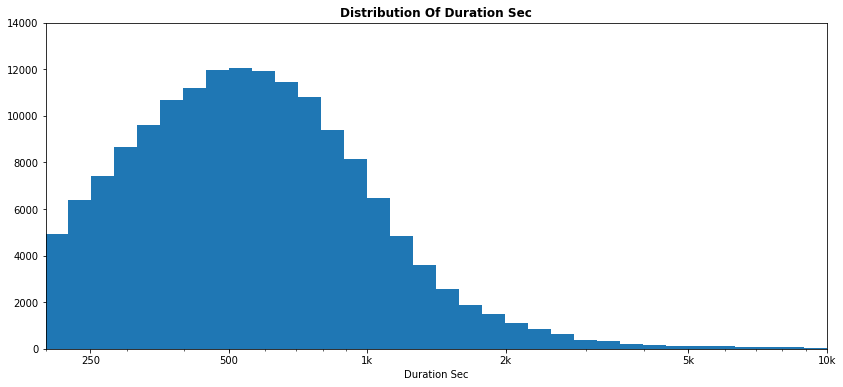

In [17]:
loghist(df, 'duration_sec', 0.05, 1.5,)
plt.xticks([250, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [250, 500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.axis([200, 10000, 0, 14000])

> Majority of the values fall under 1k seconds, with the values peaking at around 700.

> Next up, the first predictor variable of interest: member_age.

[10, 80, 0, 11000]

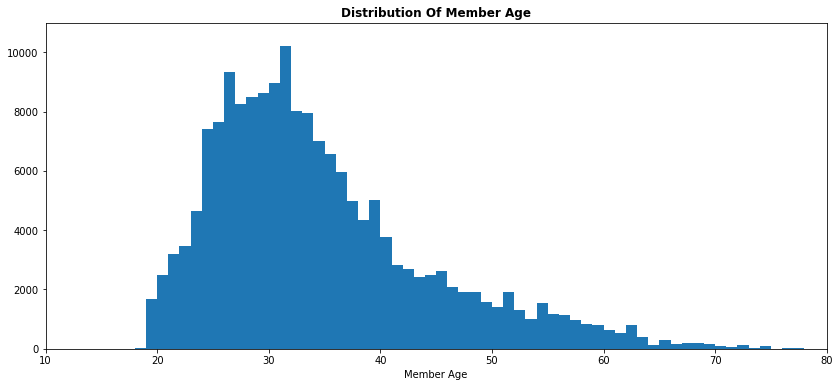

In [18]:
# Standard scaled histogram for member_age
stdhist(df, 'member_age', 1)
plt.axis([10, 80, 0, 11000])

In [19]:
# Select high outliers, using criteria eyeballed from the analysis

high_outliers = (df['member_age'] > 100)
print(high_outliers.sum())

72


> Member age is mostly distributed around the 30 to 40 years mark

> I'll now move on to the non-numerical variables in the dataset: user_type and member_gender

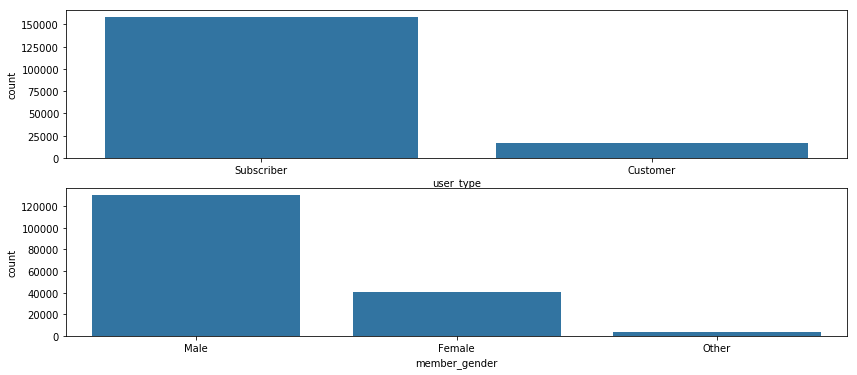

In [20]:
# let's plot both of them together.

fig, ax = plt.subplots(nrows = 2, figsize = [14,6])

sb.countplot(data = df, x = 'user_type',order = df['user_type'].value_counts().index, color = sb.color_palette()[0], ax = ax[0])
sb.countplot(data = df, x = 'member_gender',order = df['member_gender'].value_counts().index, color = sb.color_palette()[0], ax = ax[1])

> Majority of the user_types are Subscribers.

> Majority of the members are males, with the second most Females and some classifed under Other.

> I will look at the distribution for the values of bike_id

[-500, 7500, 0, 50000]

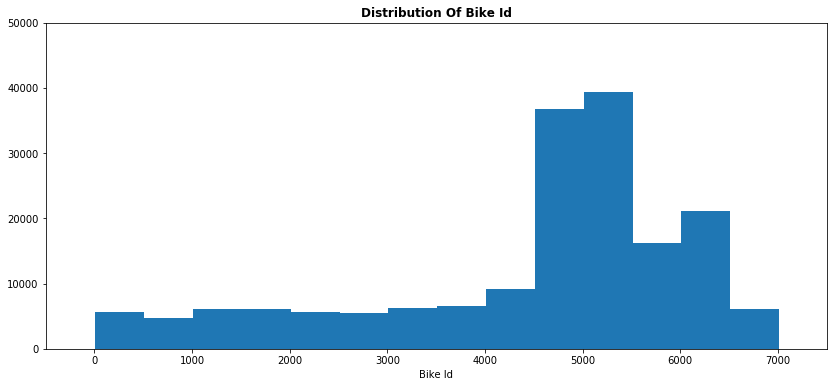

In [21]:
# Standard scaled histogram for bike_id
stdhist(df, 'bike_id', 500)
plt.axis([-500, 7500, 0, 50000])

> The values for the bike_id variable is skewed to the left on the histogram, with it peaking at around 5000.

Text(0.5,0,'Station IDs')

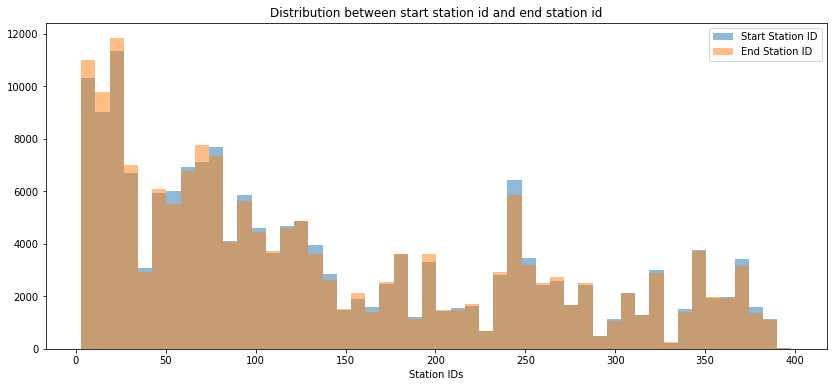

In [22]:
# Plotting two variable on the x-axis on a histogram

plt.figure(figsize = [14,6])
plt.hist(data = df, x = 'start_station_id',alpha=0.5 , bins=50,label = 'Start Station ID')
plt.hist(data = df, x = 'end_station_id',alpha=0.5 , bins=50,label = 'End Station ID')
plt.title('Distribution between start station id and end station id')
plt.legend()
plt.xlabel('Station ID''s')


> The distribution for the values in start_station_id and end_station_id is very similar.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Duration (seconds) has a long-tailed distribution, with a lot of values on the low price end, and few on the high end. When plotted on a log-scale, majority of the values fall under 1k seconds as supporte by the descriptive statistics on the duration variable above. The values peak at the 700 mark.

> Member age is mostly distributed around the 30 to 40 years mark. There is unusual values on the higher end, 72 values over a hundred. This is unlikely to be true or it can be an error in the member's age input.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> With the member_birth_year value I have calculated the member's age from the base year as 2019, as it seems this is when the dataset was pulled. The member_age has some unusual high values with a few member over a hundred years of age. Do to the fact that I am unable to verify whether this is the true age or an input error, I will kep these values in the data set and keep these possible outliers in mind throughout the analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> To start let's look at the relationship between the trip duration and the members' age through a scatter plot and a heatmap.

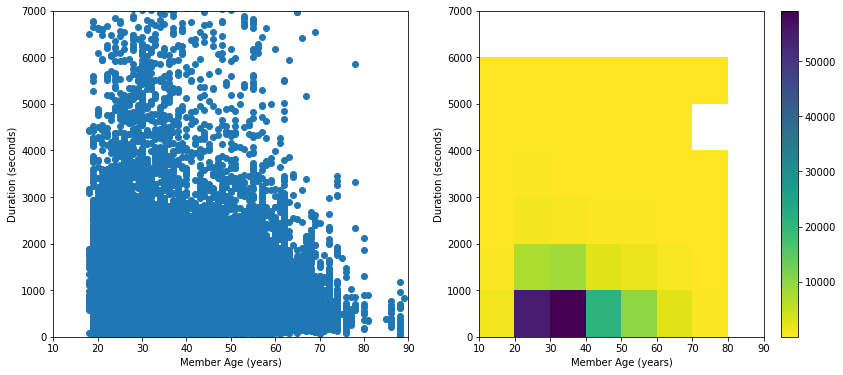

In [23]:
# Subplotting the correlation by means of a scatterplot and a heatmap

plt.figure(figsize = [14,6])

plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'member_age', y = 'duration_sec')
plt.xlabel('Member Age (years)')
plt.ylabel('Duration (seconds)')
plt.axis([10, 90, 0, 7000])

plt.subplot(1, 2, 2)
bins_x = np.arange(10, 90, 10)
bins_y = np.arange(0, 7000, 1000)
plt.hist2d(data = df, x = 'member_age', y = 'duration_sec', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.xlabel('Member Age (years)')
plt.ylabel('Duration (seconds)')
plt.axis([10, 90, 0, 7000])
plt.colorbar()

> The two plots show that most of our data is distributed over the lower duration trips and with the lower member age.
The younger memebers between 20 and 40 years have the highest trip duration in the dataset.

> Now let's look at the relationship between the trip duration and the member's gender.

Text(0,0.5,'Duration (seconds)')

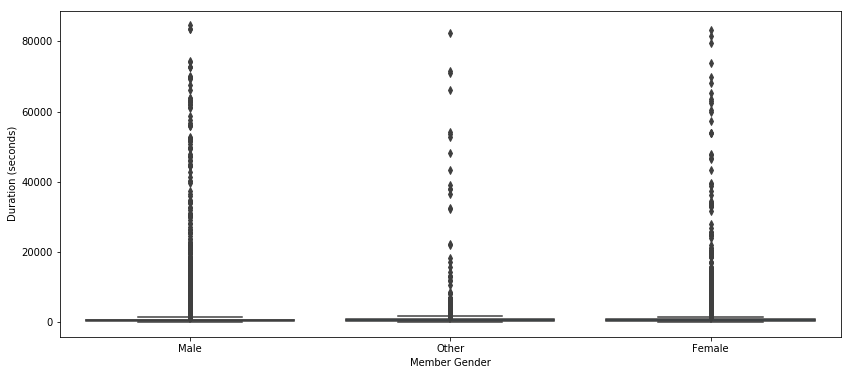

In [24]:
# This relationship will be explored by means of a boxplot.2

plt.figure(figsize = [14,6])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('Member Gender')
plt.ylabel('Duration (seconds)')

> The values seem to be concentrated at the lower end, lets do another plot and zoom in on the values.

Text(0,0.5,'Duration (seconds)')

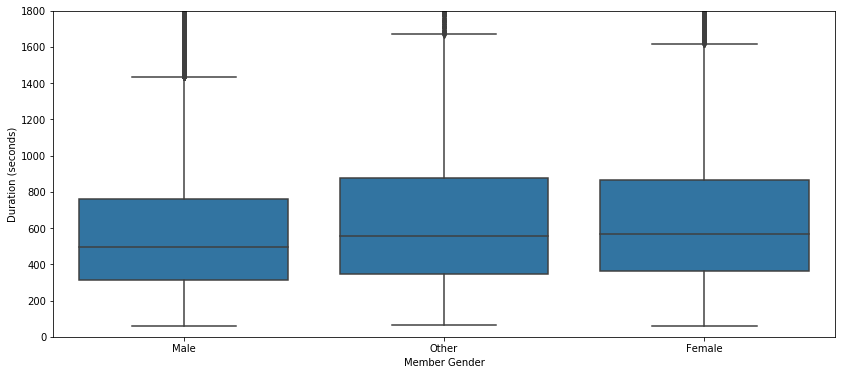

In [25]:
# Lets trim the plot by limiting the duration_sec to 1800, so that the max values also reflect in the figure.

plt.figure(figsize = [14,6])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = sb.color_palette()[0])
plt.ylim([0,1800])
plt.xlabel('Member Gender')
plt.ylabel('Duration (seconds)')

> The males, although they make up the majority of the dataset, they have the lowest trip duration between the genders. The female and other gender have the higher trip durations.

> Now let's look at the relationship between the trip duration and the user_type.

Text(0,0.5,'Duration (seconds)')

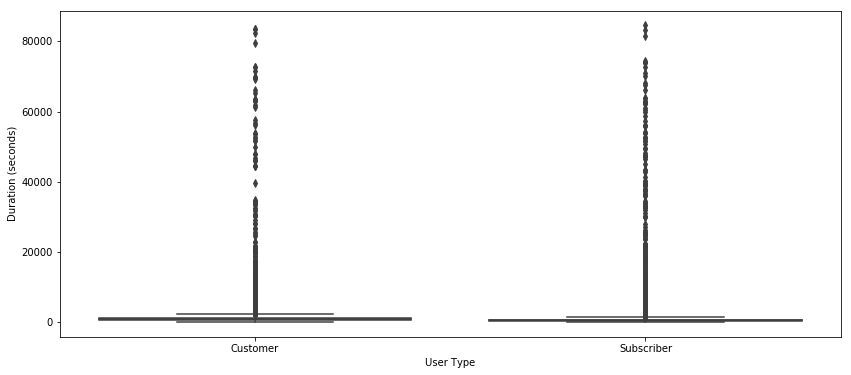

In [26]:
# This relationship will be explored by means of a boxinplot.

plt.figure(figsize = [14,6])
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')

Text(0,0.5,'Duration (seconds)')

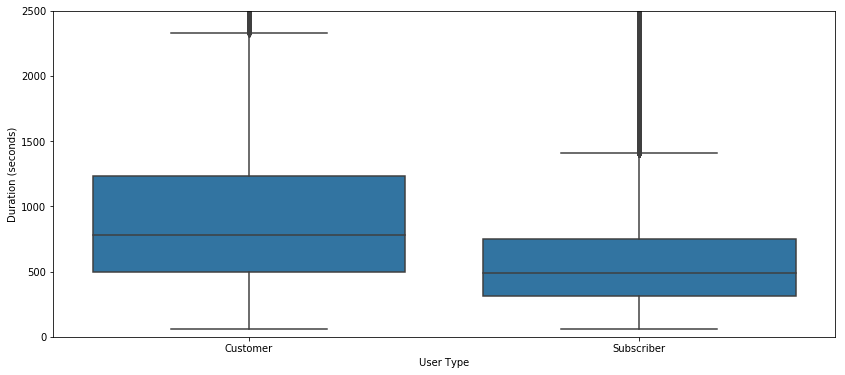

In [27]:
# Lets trim the plot by limiting the duration_sec to 2500.

plt.figure(figsize = [14,6])
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = sb.color_palette()[0])
plt.ylim([0,2500])
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')

> The Customer user type have the higher values on trip durations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between the member age and the trip duration indicates that longer trip duration is situated around the lower age members, where most of the longer trips can be found at the members between 20 and 40 years of age.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The member gender and trip duration relationship surprised me. The males although making up the majority of the dataset had the lowest trip duration values compared to females and other.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> The relationship between the categorical variables (member_age and member_gender) will be measured against the trip duration.

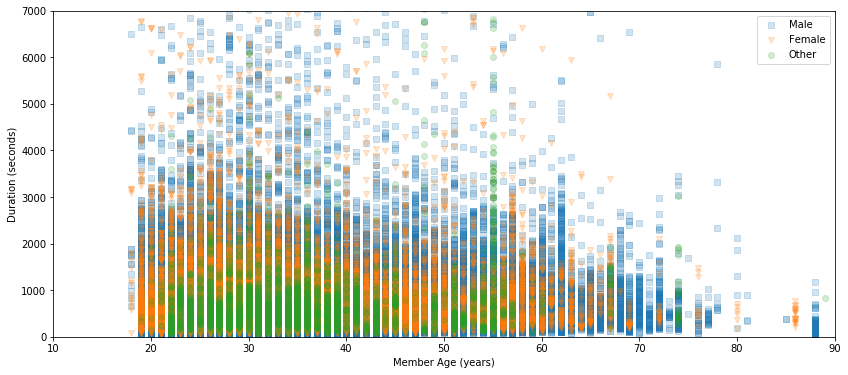

In [28]:
# Multivariate scatterplot
plt.figure(figsize = [14,6])
cat_markers = [['Male', 's'],
               ['Female', 'v'],
               ['Other', 'o']]

for cat, marker in cat_markers:
    df_cat = df[df['member_gender'] == cat]
    plt.scatter(data = df_cat, x = 'member_age', y = 'duration_sec', marker = marker, alpha = 1/5)
plt.axis([10, 90, 0, 7000])
plt.xlabel('Member Age (years)')
plt.ylabel('Duration (seconds)')
plt.legend(['Male', 'Female', 'Other'])    

> The data points seems to be overplotted and it dificult to make proper interpretations. We can get a better view for interpretation if we split the values by gender.

Text(0,0.5,'Duration (seconds)')

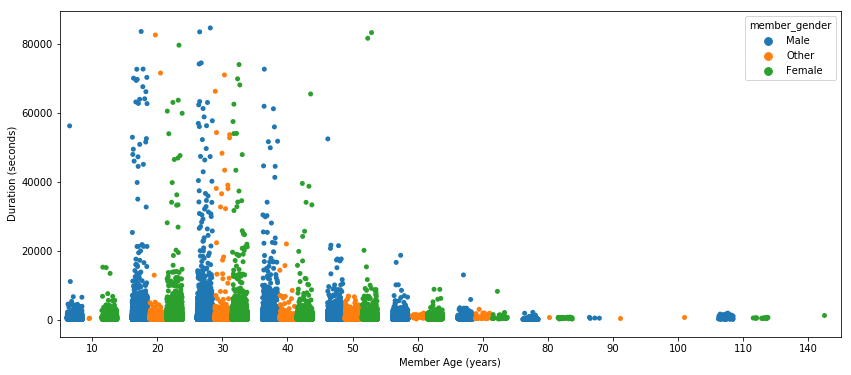

In [29]:
# Creating categorical age variable by using floor division
df['member_age_cat'] = ((df['member_age']//10)*10).astype(int)

# Setting plot arguments
plt.figure(figsize = [14,6])
sb.stripplot(data = df, x = 'member_age_cat', y = 'duration_sec', hue = 'member_gender', jitter = 0.35, dodge = True)
plt.xlabel('Member Age (years)')
plt.ylabel('Duration (seconds)')

> This looks better, but we can have a better view without all the outliers.

Text(0,0.5,'Duration (seconds)')

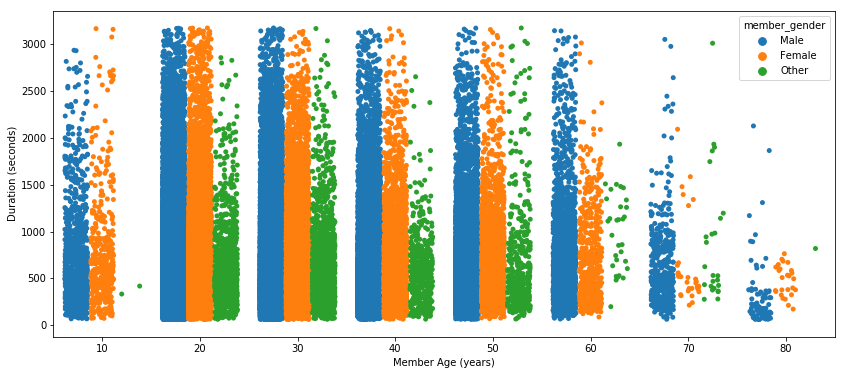

In [30]:
# We are creating the Stripplot again, without the vertical and horisontal outliers
df['member_age_cat'] = ((df['member_age']//10)*10).astype(int)

# Setting plot arguments
plt.figure(figsize = [14,6])
sb.stripplot(data = df.query('member_age <= 90 and duration_sec <= duration_sec.quantile(0.99)'),
             x = 'member_age_cat', y = 'duration_sec', hue = 'member_gender', jitter = 0.35, dodge = True)
plt.xlabel('Member Age (years)')
plt.ylabel('Duration (seconds)')

> Wow, this really puts it into perspective! Now its more clear that the member age 20 - 40 are the most active, I will add in the males of age 50 as well.

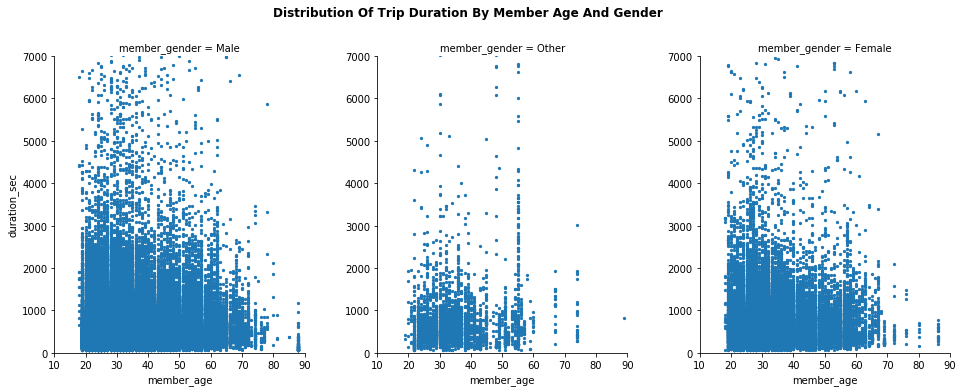

In [31]:
# We can also look at each gender seperately by Faceting across the gender values on scatterplots

g = sb.FacetGrid(data = df, col = 'member_gender', xlim = [10, 90], ylim = [0, 7000])
g.map(plt.scatter, 'member_age', 'duration_sec',  s = 5,)
# Chart title
plt.suptitle('Distribution of trip duration by member age and gender'.title(), y = 1, weight = 'bold')
# Figure size
g.fig.set_size_inches(14,6)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The males have more values at the higher duration values compared to female and other, but due to the high value on the lower range it brings the mean and median down as we have seen in the boxplot.

### Were there any interesting or surprising interactions between features?

> For the Other gender there seems to be another peak between 50 and 60 years of age.

## Conclusions
> My findings from the dataset is that a lot of adults between the age of 20 and 40 like to go on bike rides for short rides up to 1000 seconds, majority of this group consists of males.
